## First: read the code bases from extracted_codebases_all and analyze them with Bandit

In [ ]:
import os
import subprocess
import json
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import shutil  # Import shutil for copying files

def get_code_number(filename):
    return int(filename.split("_")[-1].split(".")[0])

def run_bandit(filename):
    command = f"bandit -f json {filename}"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    return result.stdout

# Create the directory for vulnerable codebases if it doesn't exist
vulnerable_codebases_dir = 'extracted_codebases_vul'
os.makedirs(vulnerable_codebases_dir, exist_ok=True)

# Paths to the directories containing the .py files
directories = ["extracted_codebases_all"]

file_names = []
for directory in directories:
    file_names.extend([os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.py')])

# Sort the file_names list based on the custom sorting key
# file_names.sort(key=get_code_number)    

results_table = PrettyTable(["File", "Discovered CWEs", "Total CWEs"])

total_cwes = []  # To store the total number of CWEs for each code
all_cwe_ids = []  # To store all identified CWE IDs

for filename in file_names:
    print(f"Analyzing {filename}")
    analysis_result = run_bandit(filename)
    result_json = json.loads(analysis_result)

    unique_cwe_ids = set()

    if "results" in result_json and result_json["results"]:
        for issue in result_json["results"]:
            cwe_id = str(issue["issue_cwe"]["id"])
            unique_cwe_ids.add(cwe_id)
            
        if unique_cwe_ids:  # If there are CWEs found, copy the file
            shutil.copy(filename, vulnerable_codebases_dir)

        unique_cwes_str = ", ".join(unique_cwe_ids)
        total_unique_cwes = len(unique_cwe_ids)
        results_table.add_row([filename, unique_cwes_str, total_unique_cwes])
        total_cwes.append(total_unique_cwes)
        all_cwe_ids.extend(unique_cwe_ids)
    else:
        results_table.add_row([filename, "No issues found", 0])
        total_cwes.append(0)

    print("=" * 40)  # Print a separator

# Print the original table
print("Original Table:")
print(results_table)


## Second: From the above codes, select the ones having CWE count >0, and save these ina  folder "extracted_codebases_vul"

In [ ]:
import os
import subprocess
import json
import matplotlib.pyplot as plt
from prettytable import PrettyTable

def get_code_number(filename):
    # Split the filename by "_" and get the last part (the number), then convert it to an integer
    return int(filename.split("_")[-1].split(".")[0])




def run_bandit(filename):
    command = f"bandit -f json {filename}"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    return result.stdout

# Paths to the directories containing the .py files
directories = ["selected_1000"]

file_names = []
for directory in directories:
    file_names.extend([os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.py')])

# Sort the file_names list based on the custom sorting key
# file_names.sort(key=get_code_number)    
    
    
results_table = PrettyTable(["File", "Discovered CWEs", "Total CWEs"])

total_cwes = []  # To store the total number of CWEs for each code
all_cwe_ids = []  # To store all identified CWE IDs

for filename in file_names:
    print(f"Analyzing {filename}")
    analysis_result = run_bandit(filename)
    result_json = json.loads(analysis_result)

    unique_cwe_ids = set()

    if "results" in result_json and result_json["results"]:
        for issue in result_json["results"]:
            cwe_id = str(issue["issue_cwe"]["id"])
            unique_cwe_ids.add(cwe_id)
            

        unique_cwes_str = ", ".join(unique_cwe_ids)
        total_unique_cwes = len(unique_cwe_ids)
        results_table.add_row([filename, unique_cwes_str, total_unique_cwes])
        total_cwes.append(total_unique_cwes)
        all_cwe_ids.append(list(unique_cwe_ids))
    else:
        results_table.add_row([filename, "No issues found", 0])
        total_cwes.append(0)

    print("=" * 40)  # Print a separator

# Print the original table
print("Original Table:")
print(results_table)

all_cwe_ids = [item for sublist in all_cwe_ids for item in sublist]

In [ ]:
results_table

In [ ]:
# Initialize an empty list to store the discovered CWEs
discovered_cwes = []

# Assuming 'results_table' is your PrettyTable object
for row in results_table:
    # Each 'row' is a list of the cell values in the order they were added to the table
    # Assuming "Discovered CWEs" is the second column in the table, it would have an index of 1
    # Adjust the index as per your table's actual structure
    discovered_cwes.append(row.get_string(fields=["Discovered CWEs"]).strip())

# 'discovered_cwes' now contains all the CWE IDs as they were listed in the "Discovered CWEs" column


In [34]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 16
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['font.family'] = 'DejaVu Sans'

## Third: plot the stats of the slected dataset

In [ ]:
# discovered_cwes

In [ ]:
import os
import ast
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

line_counts = []
function_counts = []

def count_functions(node):
    """Count function definitions in an AST node."""
    return sum(1 for n in ast.walk(node) if isinstance(n, ast.FunctionDef))

for filename in file_names:
    print(f"Analyzing {filename}")

    # Counting lines
    with open(filename, 'r') as f:
        lines = f.readlines()
        line_count = len(lines)
        line_counts.append(line_count)

    # Counting functions
    try:
        with open(filename, 'r') as f:
            content = f.read()
            tree = ast.parse(content)
            function_count = count_functions(tree)
            function_counts.append(function_count)
    except SyntaxError:
        print(f"Failed to parse {filename} due to syntax error.")
        continue

    print(f"{filename}: {line_count} lines, {function_count} functions")
    print("=" * 40)  # Print a separator


    # Counting functions
    with open(filename, 'r') as f:
        content = f.read()
        tree = ast.parse(content)
        function_count = count_functions(tree)
        function_counts.append(function_count)

    print(f"{filename}: {line_count} lines, {function_count} functions")
    print("=" * 40)  # Print a separator




## Third: showing the stats of the overall set (train and test)

In [2]:
import os
import subprocess
import json
import matplotlib.pyplot as plt
from prettytable import PrettyTable

def get_code_number(filename):
    # Split the filename by "_" and get the last part (the number), then convert it to an integer
    return int(filename.split("_")[-1].split(".")[0])




def run_bandit(filename):
    command = f"bandit -f json {filename}"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    return result.stdout

# Paths to the directories containing the .py files
directories = ["overall_set_march"]

file_names = []
for directory in directories:
    file_names.extend([os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.py')])

# Sort the file_names list based on the custom sorting key
# file_names.sort(key=get_code_number)    
    
    
results_table = PrettyTable(["File", "Discovered CWEs", "Total CWEs"])

total_cwes = []  # To store the total number of CWEs for each code
all_cwe_ids = []  # To store all identified CWE IDs

for i, filename in enumerate(file_names, start=1):
    print(f"Loop Counter: {i}")
    analysis_result = run_bandit(filename)
    result_json = json.loads(analysis_result)

    unique_cwe_ids = set()

    if "results" in result_json and result_json["results"]:
        for issue in result_json["results"]:
            cwe_id = str(issue["issue_cwe"]["id"])
            unique_cwe_ids.add(cwe_id)
            

        unique_cwes_str = ", ".join(unique_cwe_ids)
        total_unique_cwes = len(unique_cwe_ids)
        results_table.add_row([filename, unique_cwes_str, total_unique_cwes])
        total_cwes.append(total_unique_cwes)
        all_cwe_ids.append(list(unique_cwe_ids))
    else:
        results_table.add_row([filename, "No issues found", 0])
        total_cwes.append(0)

#     print("=" * 40)  # Print a separator

# Print the original table
print("Original Table:")
print(results_table)

all_cwe_ids = [item for sublist in all_cwe_ids for item in sublist]

Loop Counter: 1
Loop Counter: 2
Loop Counter: 3
Loop Counter: 4
Loop Counter: 5
Loop Counter: 6
Loop Counter: 7
Loop Counter: 8
Loop Counter: 9
Loop Counter: 10
Loop Counter: 11
Loop Counter: 12
Loop Counter: 13
Loop Counter: 14
Loop Counter: 15
Loop Counter: 16
Loop Counter: 17
Loop Counter: 18
Loop Counter: 19
Loop Counter: 20
Loop Counter: 21
Loop Counter: 22
Loop Counter: 23
Loop Counter: 24
Loop Counter: 25
Loop Counter: 26
Loop Counter: 27
Loop Counter: 28
Loop Counter: 29
Loop Counter: 30
Loop Counter: 31
Loop Counter: 32
Loop Counter: 33
Loop Counter: 34
Loop Counter: 35
Loop Counter: 36
Loop Counter: 37
Loop Counter: 38
Loop Counter: 39
Loop Counter: 40
Loop Counter: 41
Loop Counter: 42
Loop Counter: 43
Loop Counter: 44
Loop Counter: 45
Loop Counter: 46
Loop Counter: 47
Loop Counter: 48
Loop Counter: 49
Loop Counter: 50
Loop Counter: 51
Loop Counter: 52
Loop Counter: 53
Loop Counter: 54
Loop Counter: 55
Loop Counter: 56
Loop Counter: 57
Loop Counter: 58
Loop Counter: 59
Loop C

Loop Counter: 464
Loop Counter: 465
Loop Counter: 466
Loop Counter: 467
Loop Counter: 468
Loop Counter: 469
Loop Counter: 470
Loop Counter: 471
Loop Counter: 472
Loop Counter: 473
Loop Counter: 474
Loop Counter: 475
Loop Counter: 476
Loop Counter: 477
Loop Counter: 478
Loop Counter: 479
Loop Counter: 480
Loop Counter: 481
Loop Counter: 482
Loop Counter: 483
Loop Counter: 484
Loop Counter: 485
Loop Counter: 486
Loop Counter: 487
Loop Counter: 488
Loop Counter: 489
Loop Counter: 490
Loop Counter: 491
Loop Counter: 492
Loop Counter: 493
Loop Counter: 494
Loop Counter: 495
Loop Counter: 496
Loop Counter: 497
Loop Counter: 498
Loop Counter: 499
Loop Counter: 500
Loop Counter: 501
Loop Counter: 502
Loop Counter: 503
Loop Counter: 504
Loop Counter: 505
Loop Counter: 506
Loop Counter: 507
Loop Counter: 508
Loop Counter: 509
Loop Counter: 510
Loop Counter: 511
Loop Counter: 512
Loop Counter: 513
Loop Counter: 514
Loop Counter: 515
Loop Counter: 516
Loop Counter: 517
Loop Counter: 518
Loop Count

Loop Counter: 920
Loop Counter: 921
Loop Counter: 922
Loop Counter: 923
Loop Counter: 924
Loop Counter: 925
Loop Counter: 926
Loop Counter: 927
Loop Counter: 928
Loop Counter: 929
Loop Counter: 930
Loop Counter: 931
Loop Counter: 932
Loop Counter: 933
Loop Counter: 934
Loop Counter: 935
Loop Counter: 936
Loop Counter: 937
Loop Counter: 938
Loop Counter: 939
Loop Counter: 940
Loop Counter: 941
Loop Counter: 942
Loop Counter: 943
Loop Counter: 944
Loop Counter: 945
Loop Counter: 946
Loop Counter: 947
Loop Counter: 948
Loop Counter: 949
Loop Counter: 950
Loop Counter: 951
Loop Counter: 952
Loop Counter: 953
Loop Counter: 954
Loop Counter: 955
Loop Counter: 956
Loop Counter: 957
Loop Counter: 958
Loop Counter: 959
Loop Counter: 960
Loop Counter: 961
Loop Counter: 962
Loop Counter: 963
Loop Counter: 964
Loop Counter: 965
Loop Counter: 966
Loop Counter: 967
Loop Counter: 968
Loop Counter: 969
Loop Counter: 970
Loop Counter: 971
Loop Counter: 972
Loop Counter: 973
Loop Counter: 974
Loop Count

In [11]:
# Initialize an empty list to store the discovered CWEs
discovered_cwes = []

# Assuming 'results_table' is your PrettyTable object
for row in results_table:
    # Each 'row' is a list of the cell values in the order they were added to the table
    # Assuming "Discovered CWEs" is the second column in the table, it would have an index of 1
    # Adjust the index as per your table's actual structure
    discovered_cwes.append(row.get_string(fields=["Discovered CWEs"]).strip())

# 'discovered_cwes' now contains all the CWE IDs as they were listed in the "Discovered CWEs" column


In [12]:
### Fig part a: CWE histogram

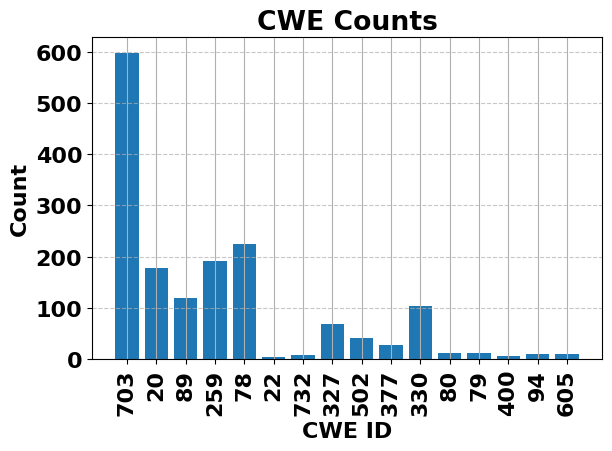

In [74]:
import re

# Initialize an empty list to store the extracted CWE IDs
extracted_cwes = []

# Regular expression to find CWE IDs within the PrettyTable formatted strings
cwe_id_pattern = re.compile(r'\|\s*([\d, ]+)\s*\|')

for entry in discovered_cwes:
    # Search for CWE IDs in each entry
    match = cwe_id_pattern.search(entry)
    if match:
        # Extract the matched CWE IDs, split by comma, and strip whitespace
        cwe_ids = match.group(1).split(',')
        cwe_ids = [cwe_id.strip() for cwe_id in cwe_ids if cwe_id.strip()]
        extracted_cwes.extend(cwe_ids)


# Count the occurrences of each CWE ID
from collections import Counter
cwe_counts = Counter(extracted_cwes)

# Plotting the histogram of CWE occurrences
plt.tight_layout()
plt.grid(True)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.bar(cwe_counts.keys(), cwe_counts.values())
plt.xlabel('CWE ID')

plt.ylabel('Count')
plt.title('CWE Counts')
plt.xticks(rotation=90)  # Rotate labels to prevent overlap
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
base_filename = "dataset_stats_march/CWE_hist"
plt.tight_layout()  # to ensure the labels do not get cut off during save
plt.savefig(f"{base_filename}.png", dpi=150, bbox_inches='tight')
plt.savefig(f"{base_filename}.pdf", dpi=150, bbox_inches='tight')
plt.show()


In [73]:
len(cwe_counts.keys())

16

In [64]:
### Fig part b: CWE count per codebase histogram

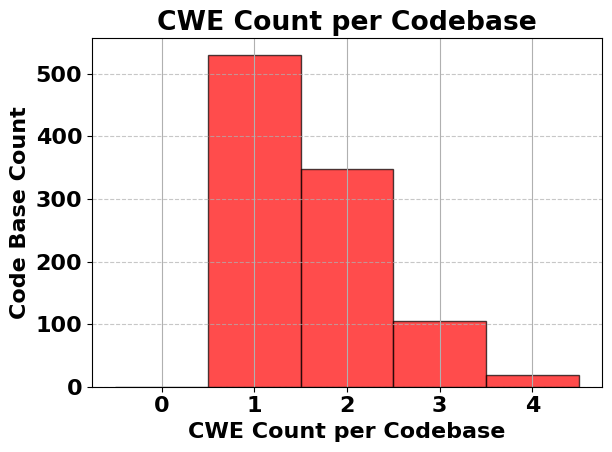

In [65]:
import matplotlib.pyplot as plt

# Adjusted Plot 2: Histogram of Number of CWEs per Codebase
plt.figure()
# Calculate the maximum number of CWEs found in a single codebase for bin range
max_cwes = max(total_cwes) + 1
# Create bins from 0 to max_cwes with each bin representing an exact integer value
bins = [i - 0.5 for i in range(0, max_cwes + 1)]  # Shift bins to center on integers
plt.hist(total_cwes, bins=bins, color='red', alpha=0.7, edgecolor='black')
plt.xlabel('CWE Count per Codebase')
plt.ylabel('Code Base Count')
plt.title('CWE Count per Codebase')
plt.xticks(range(max_cwes))  # Ensure x-ticks are integers representing the number of CWEs
plt.grid(axis='y', alpha=0.75)
plt.grid(True)
plt.grid(axis='y', linestyle='--', alpha=0.7)
base_filename = "dataset_stats_march/per_codebase_cwe_count_hist"
plt.tight_layout()  # to ensure the labels do not get cut off during save
plt.savefig(f"{base_filename}.png", dpi=150, bbox_inches='tight')
plt.savefig(f"{base_filename}.pdf", dpi=150, bbox_inches='tight')
plt.show()


In [66]:
### Fig. part c: line count histogram

In [67]:
import os
import matplotlib.pyplot as plt
import numpy as np
import os
import ast
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# Specify the directory containing the codebases
directory_path = 'overall_set_march'

# Initialize lists to store the line counts and function counts
line_counts = []
function_counts = []

# Keep track of the number of processed Python files
processed_files_count = 0

# Iterate through each file in the directory
for filename in os.listdir(directory_path):
    # Limit the process to the first 100 Python files
    if processed_files_count >= 1000:
        break

    # Check if the file is a Python file
    if filename.endswith('.py'):
        file_path = os.path.join(directory_path, filename)
        
        with open(file_path, 'r', newline='') as file:
            content = file.read()
            lines = content.splitlines()
            line_count = len(lines)
            line_counts.append(line_count)

            # Count the number of functions in the current file
            function_count = sum(1 for line in lines if line.strip().startswith('def '))
            function_counts.append(function_count)
            
        # Increment the count of processed Python files
        processed_files_count += 1

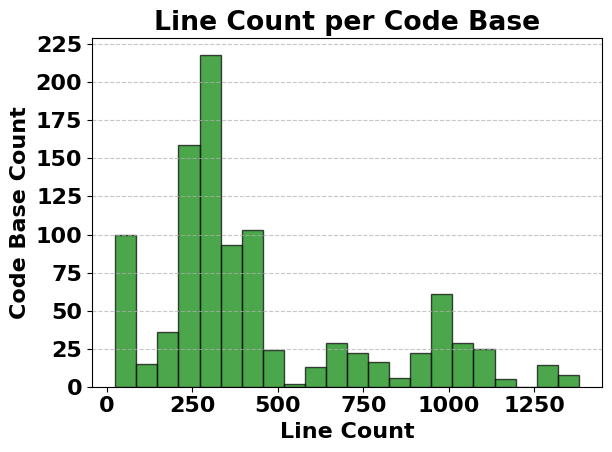

In [68]:
# Histogram for number of lines
# plt.figure(figsize=(10, 5))
plt.hist(line_counts, bins='auto', color='green', alpha=0.7, edgecolor='black')
plt.xlabel('Line Count')
plt.ylabel('Code Base Count')
plt.title('Line Count per Code Base')
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
base_filename = "dataset_stats_march/no_of_lines_hist_feb"
plt.tight_layout()  # to ensure the labels do not get cut off during save
plt.savefig(f"{base_filename}.png", dpi=150, bbox_inches='tight')
plt.savefig(f"{base_filename}.pdf", dpi=150, bbox_inches='tight')
plt.show()



In [69]:
### Fig. part d: function count histogram

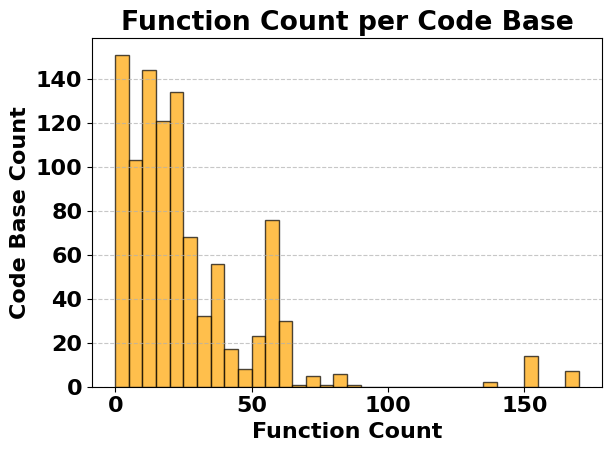

In [70]:
# Histogram for number of functions
# plt.figure(figsize=(10, 5))
plt.hist(function_counts, bins='auto', color='orange', alpha=0.7, edgecolor='black')
plt.xlabel('Function Count')
plt.ylabel('Code Base Count')
plt.title('Function Count per Code Base')
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
base_filename = "dataset_stats_march/_no_of_functions_hist_feb"
plt.tight_layout()  # to ensure the labels do not get cut off during save
plt.savefig(f"{base_filename}.png", dpi=150, bbox_inches='tight')
plt.savefig(f"{base_filename}.pdf", dpi=150, bbox_inches='tight')
plt.show()